In [1]:
# Standard import
#  conda install --channel https://conda.anaconda.org/menpo opencv3
import cv2
import numpy as np
from matplotlib import pyplot as plt

# read image
file_image = '../images/5180104844.020.A.BMP'
img = cv2.imread(file_image)
print(img.shape)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.imshow(thresh, cmap='gray')

(896, 1017, 3)


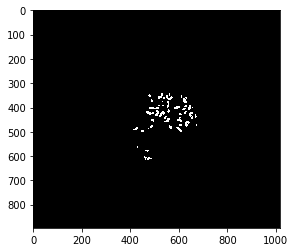

In [2]:
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)
plt.imshow(opening, cmap='gray')




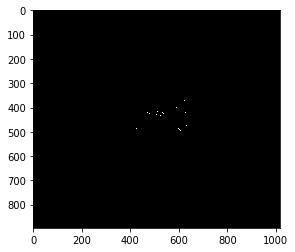

In [3]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
plt.imshow(sure_fg, cmap='gray')

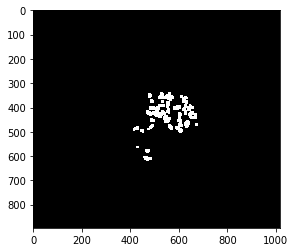

In [4]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)

plt.imshow(sure_bg, cmap='gray')

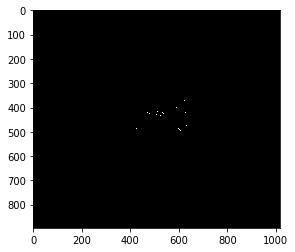

In [5]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

plt.imshow(sure_fg, cmap='gray')

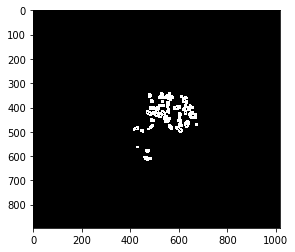

In [6]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

plt.imshow(unknown, cmap='gray')

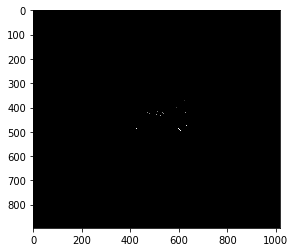

In [7]:
ret, markers = cv2.connectedComponents(sure_fg)

plt.imshow(markers, cmap='gray')

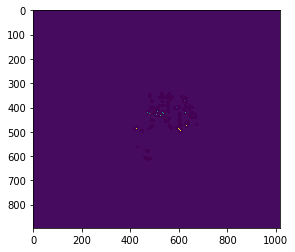

In [8]:
markers = markers+1
markers[unknown==255] = 0

plt.imshow(markers)

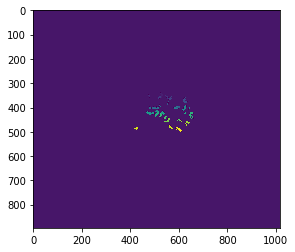

In [9]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.imshow(markers)

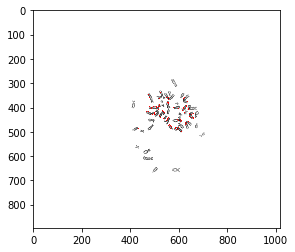

In [10]:
plt.imshow(img)


In [15]:
def show_image(image, name='image'):
    cv2.imshow(name,image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
show_image(img)
